In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/Users/joaop.cardoso/MestradoCD/TMBD/TMBD_M02/METRO Interstate/Metro_Interstate_Traffic_Volume.csv')
print(df.describe())
df.head()

               temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.338232     44.789133      0.008168     39.015750     1986.860670
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%      272.160000      0.000000      0.000000      1.000000     1193.000000
50%      282.450000      0.000000      0.000000     64.000000     3380.000000
75%      291.806000      0.000000      0.000000     90.000000     4933.000000
max      310.070000   9831.300000      0.510000    100.000000     7280.000000


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


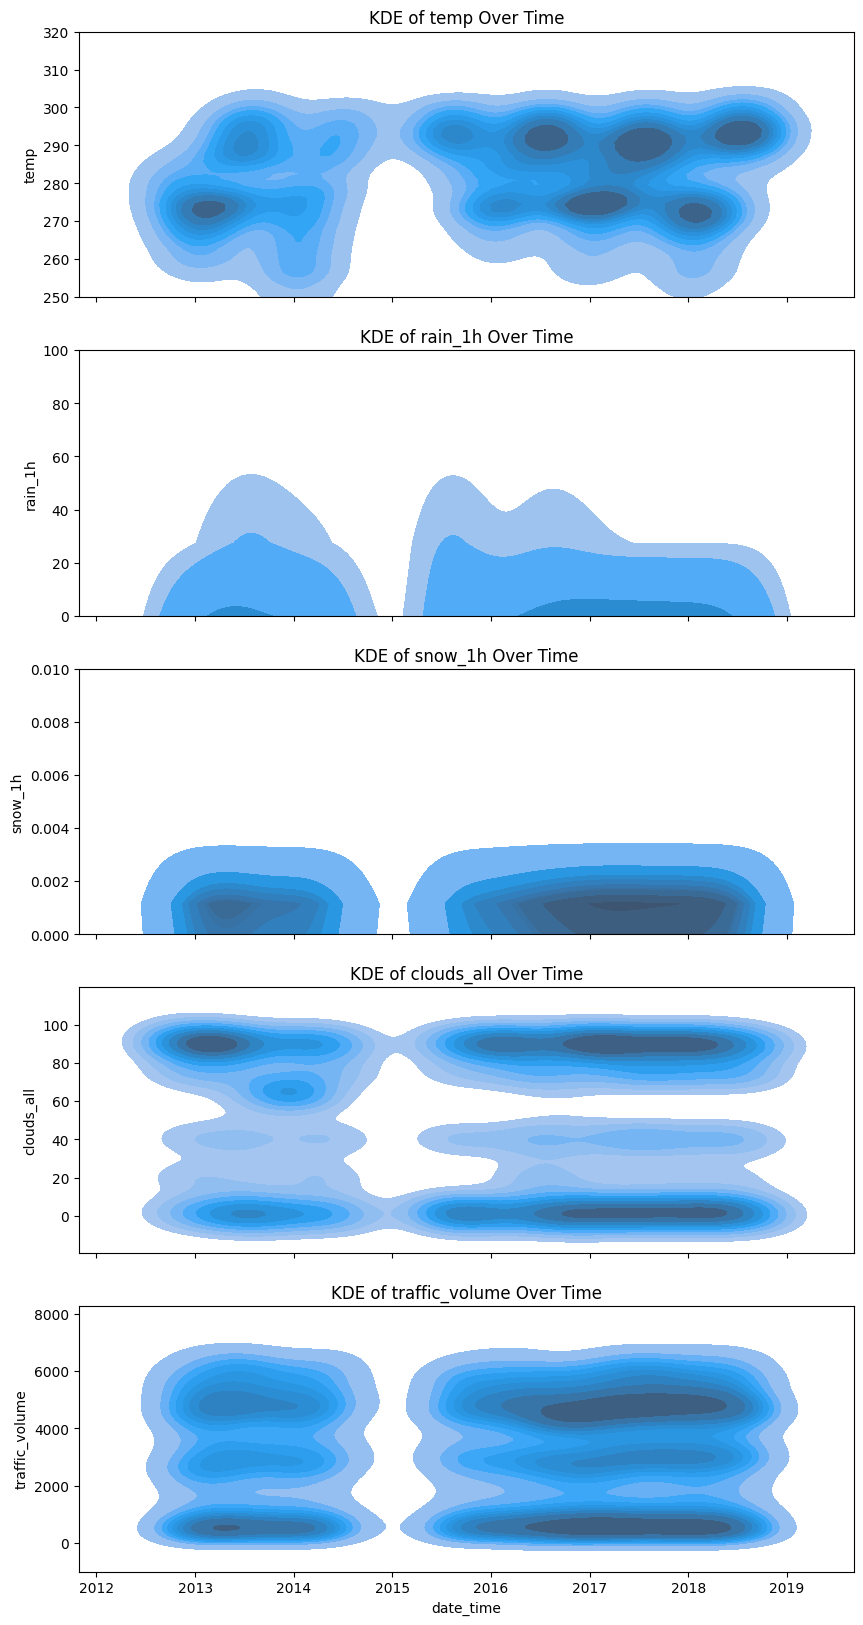

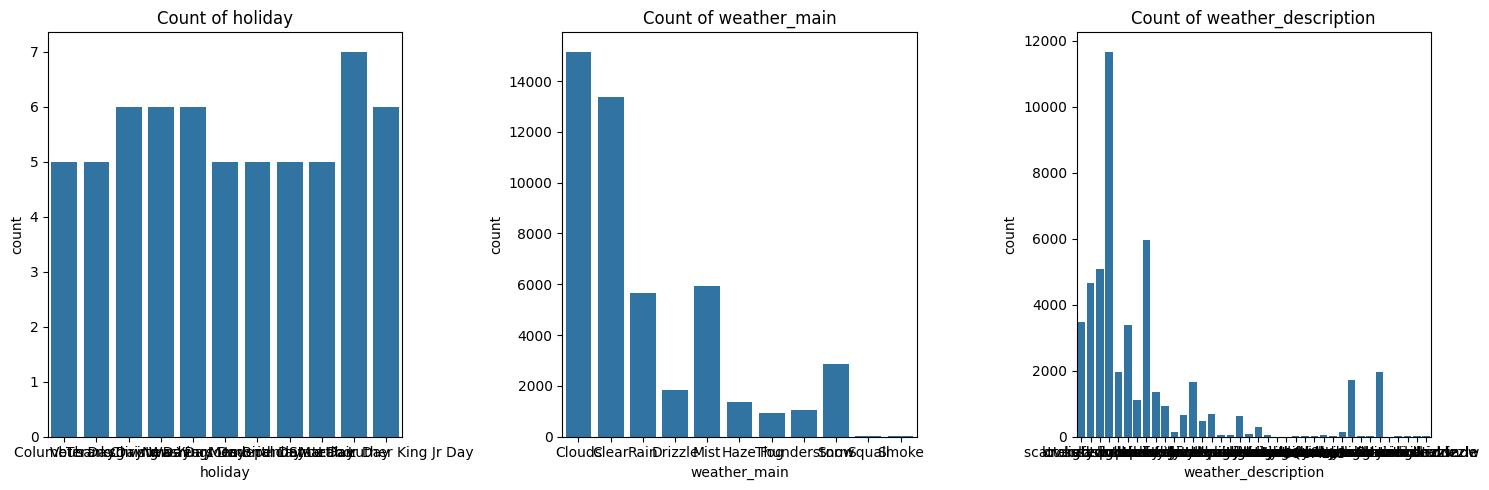

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame structure for illustration (actual data is assumed to be in `df`)
# KDE plots for quantitative variables over time
quantitative_vars = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']

# Ensure date_time is in datetime format if not already
df['date_time'] = pd.to_datetime(df['date_time'])

# Set up KDE plots
fig, axes = plt.subplots(len(quantitative_vars), 1, figsize=(10, 20), sharex=True)
for i, var in enumerate(quantitative_vars):
    sns.kdeplot(x='date_time', y=var, data=df, ax=axes[i], fill=True)
    axes[i].set_title(f'KDE of {var} Over Time') # Automatically adjust y-axis to data without manually setting limits
    # Adjust y-axis limits for 'rain_1h' and 'snow_1h'
    if var in ['temp']:
        axes[i].set_ylim(250, 320)
    if var in ['rain_1h']:
        axes[i].set_ylim(0, 100)
    if var in ['snow_1h']:
        axes[i].set_ylim(0, 0.01)

# Bar plots for categorical variables
categorical_vars = ['holiday', 'weather_main', 'weather_description']
fig, axes = plt.subplots(1, len(categorical_vars), figsize=(15, 5))

for i, var in enumerate(categorical_vars):
    sns.countplot(data=df, x=var, ax=axes[i])
    axes[i].set_title(f'Count of {var}')

plt.tight_layout()
plt.show()


In [7]:
def remove_outliers(df, column, threshold=10.0):
    """
    Remove rows where values in `column` exceed `threshold` times the IQR beyond Q1 or Q3.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [8]:
# Quantitative variables for filtering
quantitative_vars = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']

# Remove outliers from each quantitative variable
df_filtered = df.copy()
for var in quantitative_vars:
    df_filtered = remove_outliers(df_filtered, var)


/var/folders/kl/mfb9z6_d1290hf_1b38hg6zr0000gn/T/ipykernel_44483/597960140.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i // 2, i % 2].set_xticklabels(axes[i // 2, i % 2].get_xticklabels(), rotation=45)
/var/folders/kl/mfb9z6_d1290hf_1b38hg6zr0000gn/T/ipykernel_44483/597960140.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i // 2, i % 2].set_xticklabels(axes[i // 2, i % 2].get_xticklabels(), rotation=45)
/var/folders/kl/mfb9z6_d1290hf_1b38hg6zr0000gn/T/ipykernel_44483/597960140.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i // 2, i % 2].set_xticklabels(axes[i // 2, i % 2].get_xticklabels(), rotation=45)
/var/folders/kl/mfb9z6_d1290hf_1b38hg6zr0000gn/T/ipykernel_44483/597960140.py:9: UserWarning: set_tickl

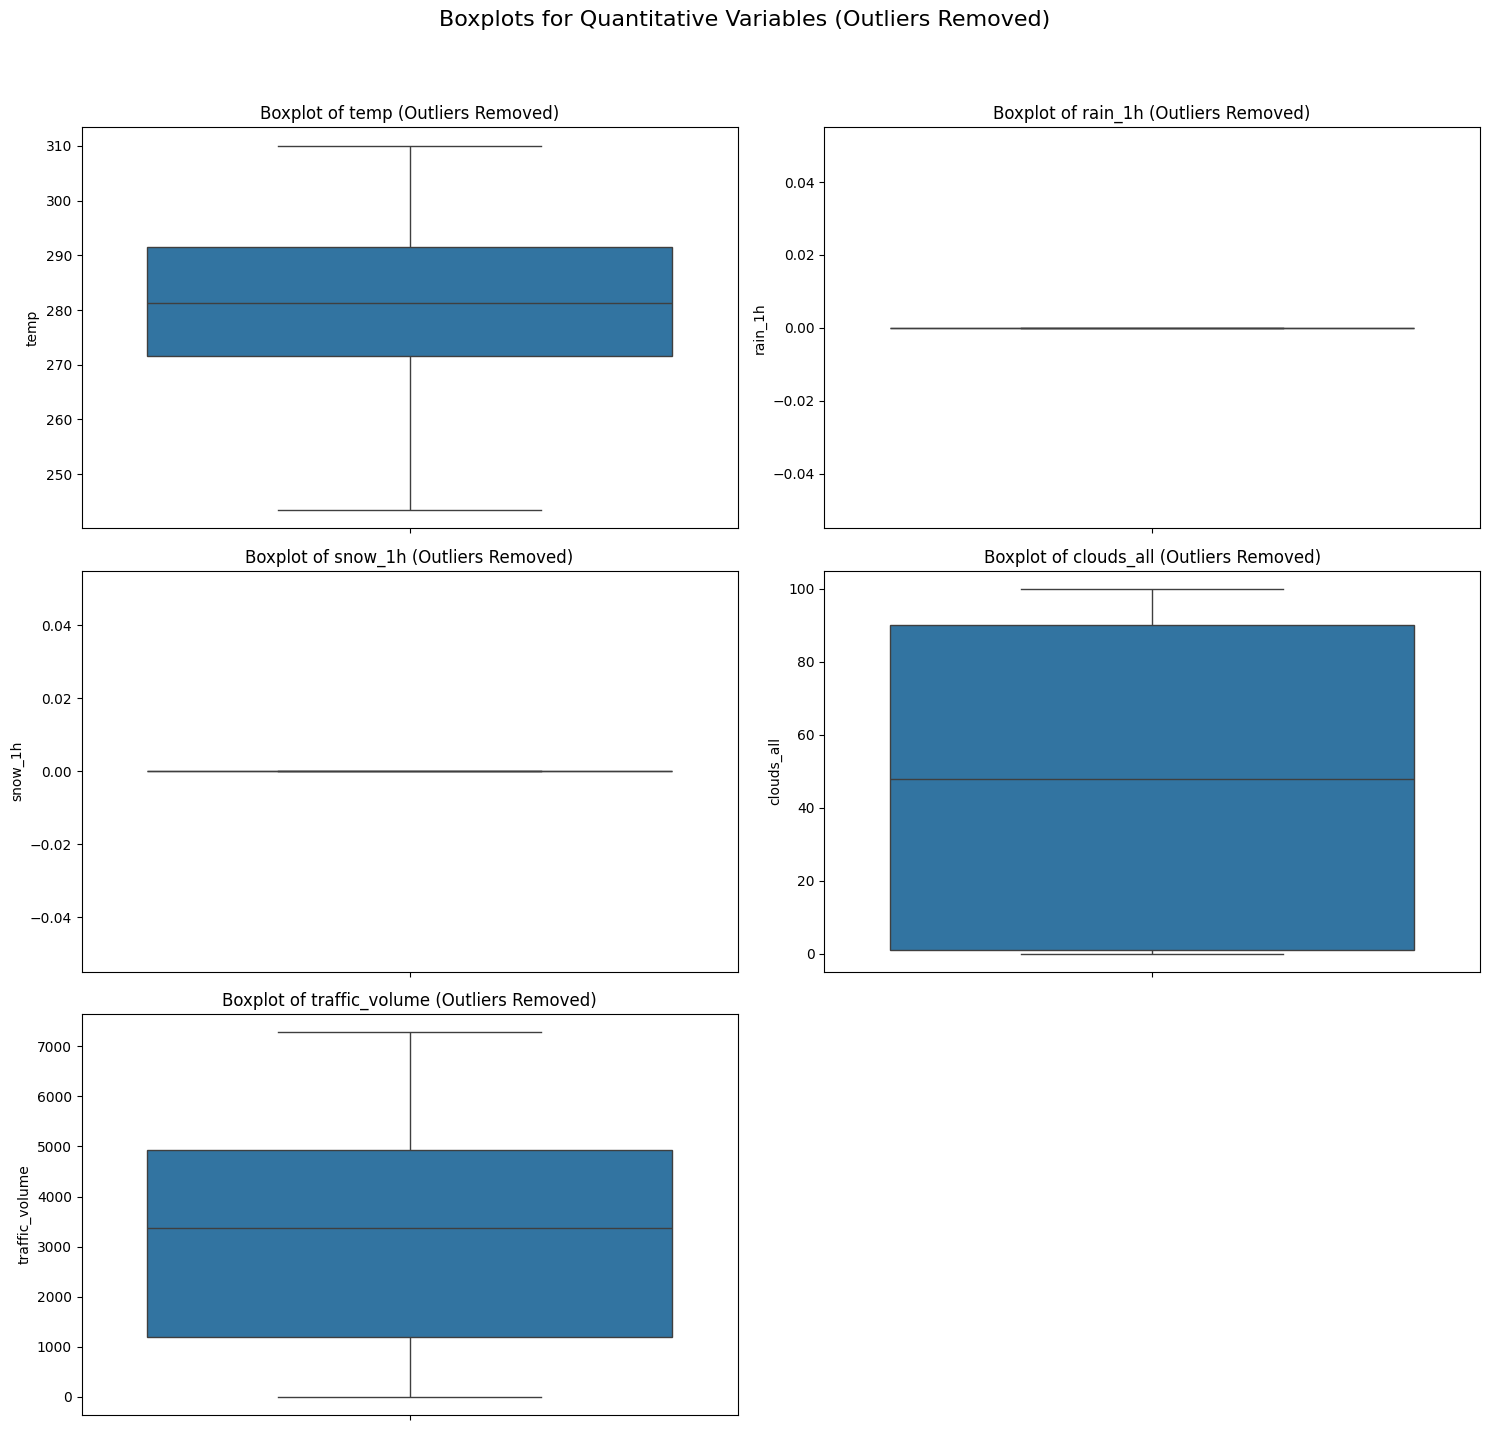

In [ ]:
# Set up the figure with subplots for each quantitative variable
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("Boxplots for Quantitative Variables (Outliers Removed)", fontsize=16)

# Plot each quantitative variable independently with a boxplot
for i, var in enumerate(quantitative_vars):
    sns.boxplot(data=df_filtered, y=var, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Boxplot of {var} (Outliers Removed)')
    axes[i // 2, i % 2].set_xticklabels(axes[i // 2, i % 2].get_xticklabels(), rotation=45)

# Hide the last empty subplot if the number of variables is odd
axes[-1, -1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()

In [10]:
# Count frequency for weather_main classes
weather_main_counts = df['weather_main'].value_counts()
print("Frequency of weather_main classes:\n", weather_main_counts)

# Count frequency for weather_description classes
weather_description_counts = df['weather_description'].value_counts()
print("\nFrequency of weather_description classes:\n", weather_description_counts)


Frequency of weather_main classes:
 weather_main
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64

Frequency of weather_description classes:
 weather_description
sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm            

In [12]:
# Combine weather_main and weather_description into a single column
df['weather_combined'] = df['weather_main'] + " - " + df['weather_description']

# Count frequency of each unique combination
weather_combined_counts = df['weather_combined'].value_counts()
print("Frequency of weather_main and weather_description combinations:\n", weather_combined_counts)


Frequency of weather_main and weather_description combinations:
 weather_combined
Clear - sky is clear                                  11665
Mist - mist                                            5950
Clouds - overcast clouds                               5081
Clouds - broken clouds                                 4666
Clouds - scattered clouds                              3461
Rain - light rain                                      3372
Clouds - few clouds                                    1956
Snow - light snow                                      1946
Clear - Sky is Clear                                   1726
Rain - moderate rain                                   1664
Haze - haze                                            1360
Drizzle - light intensity drizzle                      1100
Fog - fog                                               912
Thunderstorm - proximity thunderstorm                   673
Drizzle - drizzle                                       651
Snow - heavy snow 

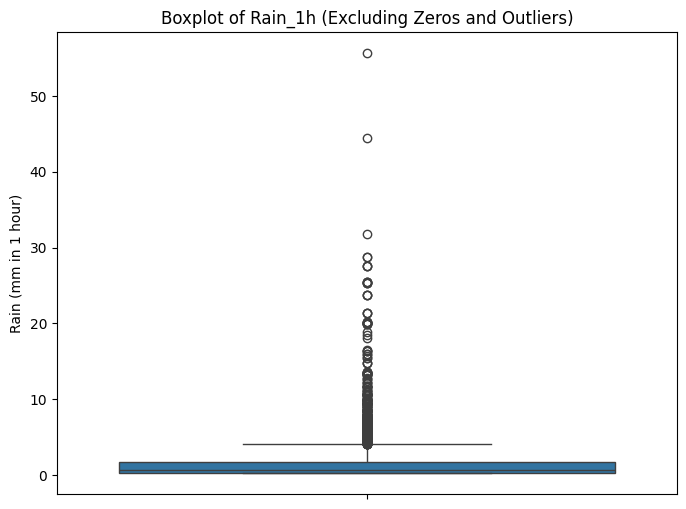

In [15]:
# Define the threshold to exclude outliers (e.g., 1000 mm/hour)
threshold = 1000

# Filter out rows where rain_1h is zero or above the threshold
rain_data_filtered = df[(df['rain_1h'] > 0) & (df['rain_1h'] < threshold)]

# Create a boxplot for rain_1h with the filtered data
plt.figure(figsize=(8, 6))
sns.boxplot(y=rain_data_filtered['rain_1h'])
plt.title('Boxplot of Rain_1h (Excluding Zeros and Outliers)')
plt.ylabel('Rain (mm in 1 hour)')
plt.show()

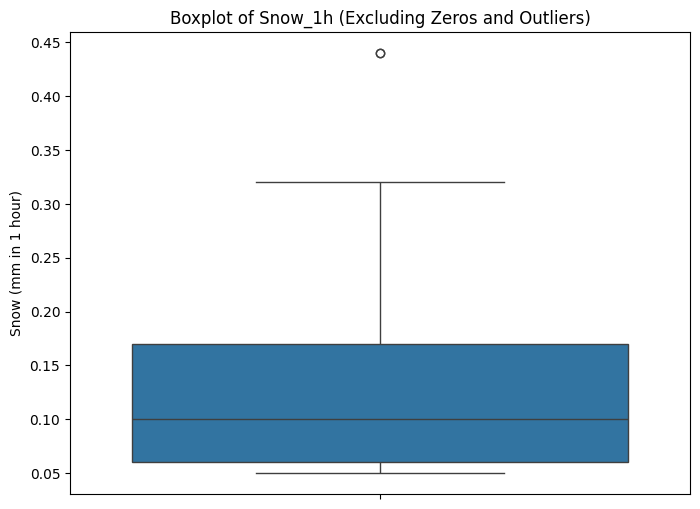

In [16]:
# Define the threshold for snow_1h to exclude outliers
threshold = 0.5

# Filter out rows where snow_1h is zero or above the threshold
snow_data_filtered = df[(df['snow_1h'] > 0) & (df['snow_1h'] < threshold)]

# Create a boxplot for snow_1h with the filtered data
plt.figure(figsize=(8, 6))
sns.boxplot(y=snow_data_filtered['snow_1h'])
plt.title('Boxplot of Snow_1h (Excluding Zeros and Outliers)')
plt.ylabel('Snow (mm in 1 hour)')
plt.show()
